In [4]:
!pip install wget
import pandas as pd
import wget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
url =  'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [6]:
downloaded_file = wget.download(url)

100% [.........................................................] 874188 / 874188

In [7]:
df = pd.read_csv(downloaded_file)

In [8]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [9]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

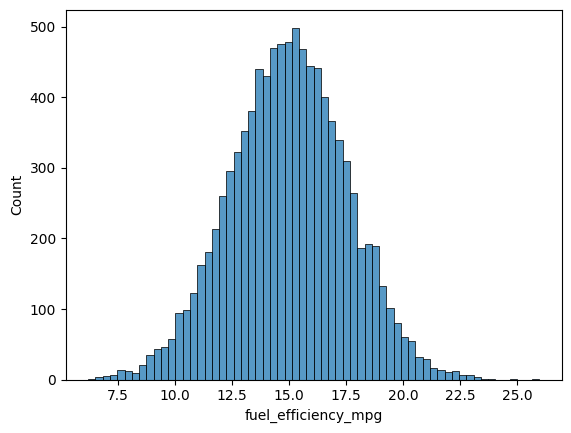

In [10]:
sns.histplot(df['fuel_efficiency_mpg'])

Question 1

In [11]:
df[base].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

'horsepower' has missing values

Question 2

In [12]:
df['horsepower'].median()

np.float64(149.0)

In [13]:
n_val = int(len(df)*0.2)

In [14]:
n_test = int(len(df)*0.2)

In [15]:
n_train = len(df) - n_val - n_test

In [16]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [17]:
idx = np.arange(len(df))

In [18]:
np.random.seed(42)

In [19]:
np.random.shuffle(idx)

In [20]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [21]:
df_train = df.iloc[idx[:n_train]]

In [22]:
df_val = df.iloc[idx[n_train:n_train + n_val]]

In [23]:
df_test = df.iloc[idx[n_train + n_val:]]

In [24]:
df_train = df_train.reset_index(drop=True)

In [25]:
df_val = df_val.reset_index(drop=True)

In [26]:
df_test = df_test.reset_index(drop=True)

Question 3

In [27]:
mean_horsepower = df_train['horsepower'].mean()

In [28]:
def prepare_X_mean (df):
    df = df.copy()
    df['age'] = 2023 - df['model_year']
    df_num = df[base]
    df_num = df_num.fillna(mean_horsepower)
    X = df_num.values
    return X

In [29]:
def prepare_X_zero (df):
    df = df.copy()
    df['age'] = 2023 - df['model_year']
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [30]:
def train_linear_regression (X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [31]:
def rmse (y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [32]:
x_train_mean = prepare_X_mean (df_train)

In [33]:
x_train_zero = prepare_X_zero (df_train)

In [34]:
y_train = df_train['fuel_efficiency_mpg'].values

In [35]:
wo_mean, w_mean = train_linear_regression (x_train_mean, y_train)

In [36]:
wo_mean, w_mean

(np.float64(28.925259952113596),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [37]:
wo_zero, w_zero = train_linear_regression (x_train_zero, y_train)

In [38]:
x_val_mean = prepare_X_mean (df_val)

In [39]:
x_val_zero = prepare_X_zero (df_val)

In [40]:
y_val = df_val['fuel_efficiency_mpg'].values

In [41]:
y_pred_mean = wo_mean + x_val_mean.dot(w_mean)

In [42]:
y_pred_zero = wo_zero + x_val_zero.dot(w_zero)

In [43]:
rmse_mean = rmse (y_val, y_pred_mean)

In [44]:
rmse_zero = rmse (y_val, y_pred_zero)

In [45]:
rmse_mean, rmse_zero

(np.float64(0.46359650423506327), np.float64(0.5173782638857467))

Option with mean gives better RMSE

Question 4

In [46]:
def train_linear_regression_reg (X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX +r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [47]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_zero (df_train)
    w0, w = train_linear_regression_reg (X_train, y_train, r=r)
    X_val = prepare_X_zero (df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse (y_val, y_pred)
    print(r, w0, round(score,2))

0 28.827365475106156 0.52
0.01 24.92683842008767 0.52
0.1 11.239661084961272 0.52
1 1.7315979411936366 0.52
5 0.3638075020692219 0.52
10 0.18306246622306527 0.52
100 0.018418017306977234 0.52


0.01 gives the best result

Question 5

In [48]:
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(len(df))
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train_seed = df.iloc[idx[:n_train]]
    df_val_seed = df.iloc[idx[n_train:n_train + n_val]]
    df_test_seed = df.iloc[idx[n_train + n_val:]]
    df_train_seed = df_train_seed.reset_index(drop=True)
    df_val_seed = df_val_seed.reset_index(drop=True)
    df_test_seed = df_test_seed.reset_index(drop=True)
    X_train = prepare_X_zero (df_train_seed)
    w0, w = train_linear_regression (X_train, y_train)
    X_val = prepare_X_zero (df_val_seed)
    y_pred = w0 + X_val.dot(w)
    score = rmse (y_val, y_pred)
    print(round(np.std(np.array(score)), 10))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [49]:
round(np.std(np.array(score)), 10)

np.float64(0.0)

Question 6

In [55]:

    idx = np.arange(len(df))
    np.random.seed(9)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_full_train = pd.concat([df_train, df_val])
    df_full_train = df_full_train.reset_index(drop=True)
    X_full_train = prepare_X_zero (df_full_train)
    y_full_train = np.concatenate([y_train, y_val])
    w0, w = train_linear_regression_reg (X_full_train, y_full_train, r=0.001)
    X_test = prepare_X_zero (df_test)
    y_pred = w0 + X_test.dot(w)
    y_test = df_val['fuel_efficiency_mpg'].values
    score = rmse(y_test, y_pred)
    print(score)

2.497415242910217


In [57]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,240,2.0,136.0,4050.512290,11.5,2006,Europe,Diesel,All-wheel drive,-1.0,10.304700
1,190,2.0,141.0,3195.866942,17.2,2017,Europe,Diesel,All-wheel drive,-1.0,13.479434
2,200,3.0,184.0,3006.164370,9.9,2017,USA,Diesel,Front-wheel drive,0.0,16.190653
3,200,4.0,NaN,2947.143980,18.1,2022,Europe,Diesel,All-wheel drive,-1.0,15.446503
4,250,NaN,132.0,3114.371978,11.7,2001,Asia,Gasoline,All-wheel drive,1.0,14.472172
...,...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,161.0,3022.148840,14.9,2021,USA,Gasoline,All-wheel drive,-1.0,14.769735
5820,140,4.0,NaN,3927.946098,13.0,2016,Asia,Diesel,Front-wheel drive,1.0,10.363254
5821,210,5.0,158.0,3766.753097,19.2,2015,USA,Gasoline,All-wheel drive,0.0,10.592435
5822,140,5.0,166.0,2683.147833,12.7,2008,USA,Diesel,All-wheel drive,0.0,17.119261
